## Classification problem - will it rain?

Predicting next-day rain by training classification models on the target variable RainTomorrow.

In [1]:
#Final Assighnment Intro To Data-Science

#Part-3-1: Claccification

#Name: Israel Yaacobovich

#ID: 212403679

In [2]:
import pandas as pd
import numpy as np
import copy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

### First look

In [185]:
#loading the data
df = pd.read_csv(r'C:\Users\ישראל\DS\weather_data_set\weatherAUS.csv', parse_dates = ['Date'])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#### explnations about the different variables

In [4]:
#RainTommorow(The Target)-categorial, did it rain the day after? yes or no
#RainToday - categorial, did it rain that day? yes or no
#Temp3pm - numerical - The temprature at 3pm that day
#Temp9am - same just at 9am
#Cloud3pm - numerical - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths(1/8s). It records how many
#Cloadp9am - same just at 9am
#Pressure3pm - numerical - Atmospheric pressure reduced to mean sea level at 3pm
#Pressure9am - same just at 9am
#Humidity3pm - numerical - Humidity (percent) at 3pm
#Humidity9am - same just at 9am
#WindSpeed9am - numerical - Wind speed (km/hr) averaged over 10 minutes prior to 9am
#WindSpeed3pm - numerical - Wind speed (km/hr) averaged over 10 minutes prior to 3pm
#WindDir3pm - categorial -Direction of the wind at 3pm
#WindDir3pm - same just 9pam
#WindGustSpeed - numerical - The speed (km/h) of the strongest wind gust in the 24 hours to midnight
#WindGustDir - numerical - The direction of the strongest wind gust in the 24 hours to midnight
#SunShine - numerical - The number of hours of bright sunshine in the day.
#Location - The place in Australia the data was taken
#MaxTem - numerical - The maximum temperature in degrees celsius
#MinTemp - The opposite
#Rainfall - numerical - The amount of rainfall recorded for the day in mm
#Evaporation - numerical - evaporation (mm) in the 24 hours to 9am

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [85]:
rows = df.shape[0]
rows

145460

### Cleaning the data

In [49]:
#what precantage of each column is missing
df.isnull().sum() / df.isnull().count() *100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [186]:
#Ill try to find corralations between the features that
#exeeds 11% missing values and the others in order to fill the gaps

missing = ['Cloud9am', 'Cloud3pm', 'Evaporation', 'Sunshine']

In [187]:
#but before I use one column to fill the missing values of the other
#I should clean it as well

df.describe().iloc[[1,5]].rename({'50%': 'median'})

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.03523,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.50993,16.990631,21.68339
median,12.000000,22.600000,0.000000,4.800000,8.400000,39.00000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.00000,16.700000,21.10000


In [188]:
#Since the mean and the median are very close
#It seems like the dataset is symetrical
#that is: it doesnt contain alot of extrem outliars or big standart deviation
#for its different variables that could shift the mean away from the median
#Thus I have decided to fill the missing values with the mean

df[list(df.drop(missing, axis = 1).columns)] = df[list(df.drop(missing, axis = 1).columns)].fillna(df.mean())

df.isnull().sum() / df.isnull().count() *100

Date              0.000000
Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     0.000000
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       0.000000
Pressure3pm       0.000000
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           0.000000
Temp3pm           0.000000
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

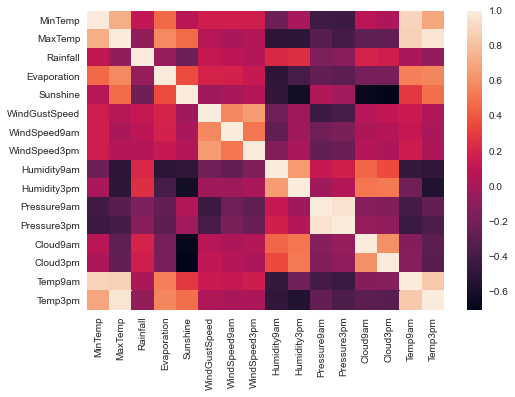

In [53]:
#corralation matrix
sns.heatmap(df.corr())
plt.show()

In [54]:
#looks like sunshine for example is strongly linked to the 
# max-temp and humidity3pm features
#lets check

df.corr().Sunshine.abs()

MinTemp          0.072366
MaxTemp          0.468067
Rainfall         0.225442
Evaporation      0.365602
Sunshine         1.000000
WindGustSpeed    0.033175
WindSpeed9am     0.005434
WindSpeed3pm     0.053688
Humidity9am      0.487703
Humidity3pm      0.623965
Pressure9am      0.041712
Pressure3pm      0.019656
Cloud9am         0.675323
Cloud3pm         0.703930
Temp9am          0.289828
Temp3pm          0.487328
Name: Sunshine, dtype: float64

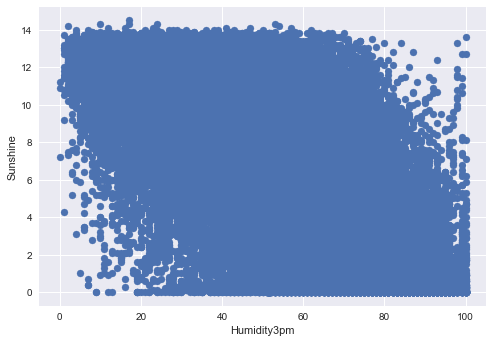

In [55]:
#I was right about the humidity, the cloud features also linked
#relativly strongly with sunshine but they are full of missing values by themselfes

plt.scatter(df.Humidity3pm, df.Sunshine)
plt.ylabel('Sunshine')
plt.xlabel('Humidity3pm')
plt.show()

In [189]:
#Categorasing to different humidity levels with a new column
#I will use those to mark the missing data in the sunshine column
#Than Ill replace the marks with a corasponding avarge
#I use negtive numbers so I wolnt chnge the origonal data

df['Humidity3pm_level'] = np.round(df['Humidity3pm'] /-20 - 1)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Humidity3pm_level
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,-2.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,-2.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,-2.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,-2.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,-3.0


In [190]:
#the avarge sunshine for each humidity group
g = df.groupby('Humidity3pm_level').Sunshine.mean()
g

Humidity3pm_level
-6.0     1.603400
-5.0     3.738467
-4.0     6.939004
-3.0     8.993714
-2.0    10.559453
-1.0    11.446591
Name: Sunshine, dtype: float64

In [191]:
#Now Ill use this to fill the missing values
df.Sunshine.fillna(value = df['Humidity3pm_level'], inplace= True)
df.Sunshine.replace(dict(g), inplace = True)
df.drop('Humidity3pm_level', axis = 1, inplace = True)
df.Sunshine.head()

0    10.559453
1    10.559453
2    10.559453
3    10.559453
4     8.993714
Name: Sunshine, dtype: float64

In [59]:
df.Sunshine.isnull().sum()

0

In [60]:
#moving on
df.corr().Evaporation.abs().nlargest(2)

Evaporation    1.000000
MaxTemp        0.586375
Name: Evaporation, dtype: float64

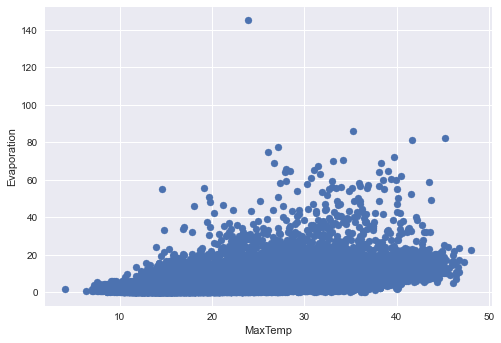

In [61]:
#so for this column Ill use the MaxTemp feture

plt.scatter(df.MaxTemp, df.Evaporation)
plt.ylabel('Evaporation')
plt.xlabel('MaxTemp')
plt.show()

In [62]:
#out-liar
df.loc[df.Evaporation > 120]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
42358,2016-12-19,Williamtown,15.3,23.9,58.2,145.0,6.939004,NaN,40.03523,NaN,...,72.0,52.0,1020.8,1017.0,8.0,1.0,19.1,23.0,Yes,No


In [192]:
df.drop(42358, axis = 0, inplace = True)
df = df.reset_index(drop = True)

In [193]:
#retracing my steps

df['MaxTemp_level'] = np.round(df['MaxTemp'] /-10 -1)

g = df.groupby('MaxTemp_level').Evaporation.mean()

df.Evaporation.fillna(value = df['MaxTemp_level'], inplace= True)
df.Evaporation.replace(dict(g), inplace = True)
df.drop('MaxTemp_level', axis = 1, inplace = True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.151147,10.559453,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,7.203248,10.559453,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,7.203248,10.559453,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,7.203248,10.559453,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,7.203248,8.993714,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [65]:
df.corr().Cloud9am.abs().nlargest(4)

Cloud9am       1.000000
Sunshine       0.622471
Cloud3pm       0.603595
Humidity3pm    0.508949
Name: Cloud9am, dtype: float64

In [66]:
#the Cloud3pm has alot of missing values by itself
#the Sunshine column is 40% artifical
#So Ill go with the Humidity3pm column

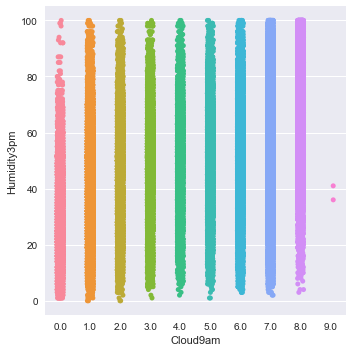

In [67]:
sns.catplot(x="Cloud9am", y="Humidity3pm", data= df)
plt.show()

In [194]:
df['Humidity3pm_level'] = np.round(df['Humidity3pm'] /-10 -1)

g = df.groupby('Humidity3pm_level').Cloud9am.median() #sould be a natural number so I took the median this time

df.Cloud9am.fillna(value = df['Humidity3pm_level'], inplace= True)
df.Cloud9am.replace(dict(g), inplace = True)
df.drop('Humidity3pm_level', axis = 1, inplace = True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.151147,10.559453,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,7.203248,10.559453,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,1.0,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,7.203248,10.559453,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,1.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,7.203248,10.559453,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,1.0,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,7.203248,8.993714,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [69]:
df.corr().Cloud9am.abs().nlargest(4)

Cloud9am       1.000000
Sunshine       0.668574
Humidity3pm    0.653297
Cloud3pm       0.593626
Name: Cloud9am, dtype: float64

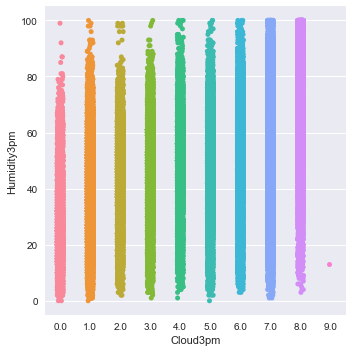

In [70]:
sns.catplot(x="Cloud3pm", y="Humidity3pm", data= df)
plt.show()

In [195]:
df['Humidity3pm_level'] = np.round(df['Humidity3pm'] /-10 -1)

g = df.groupby('Humidity3pm_level').Cloud3pm.median() # again a natural number

df.Cloud3pm.fillna(value = df['Humidity3pm_level'], inplace= True)
df.Cloud3pm.replace(dict(g), inplace = True)
df.drop('Humidity3pm_level', axis = 1, inplace = True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.151147,10.559453,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,2.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,7.203248,10.559453,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,1.0,2.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,7.203248,10.559453,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,1.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,7.203248,10.559453,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,1.0,2.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,7.203248,8.993714,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [29]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10325
WindGustSpeed        0
WindDir9am       10565
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [33]:
#categorial data

In [196]:
df.dropna(how='any', axis = 0, inplace = True)
df = df.reset_index(drop = True)

In [197]:
rows = df.shape[0]
rows

123710

In [198]:
#Normalising(1000  kg/m^2 is 1 Atmosfiric pressure but its 2 orders of magnitude bigger than the rest of the
#units in the data and so: the distance from 1000  kg/m^2 of pressure is more suitable)
df['Pressure9am'] = df['Pressure9am'] -1000
df['Pressure3pm'] = df['Pressure3pm'] -1000

In [199]:
#Changing to numeric values
df = df.replace({'Yes':1, 'No': 0})

In [200]:
#creating more comfertubale time-messurement columns 
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop(['Date'], axis = 1, inplace = True)

In [39]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,4.151147,10.559453,W,44.0,W,WNW,...,7.1,8.0,2.0,16.9,21.8,0,0,2008,12,1
1,Albury,7.4,25.1,0.0,7.203248,10.559453,WNW,44.0,NNW,WSW,...,7.8,1.0,2.0,17.2,24.3,0,0,2008,12,2
2,Albury,12.9,25.7,0.0,7.203248,10.559453,WSW,46.0,W,WSW,...,8.7,1.0,2.0,21.0,23.2,0,0,2008,12,3
3,Albury,9.2,28.0,0.0,7.203248,10.559453,NE,24.0,SE,E,...,12.8,1.0,2.0,18.1,26.5,0,0,2008,12,4
4,Albury,17.5,32.3,1.0,7.203248,8.993714,W,41.0,ENE,NW,...,6.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


### Exploring the data

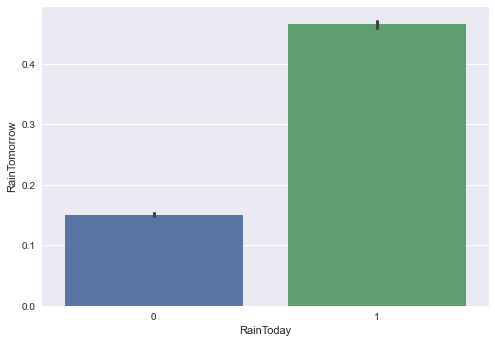

In [62]:
sns.barplot(df['RainToday'], df['RainTomorrow'])
plt.show()

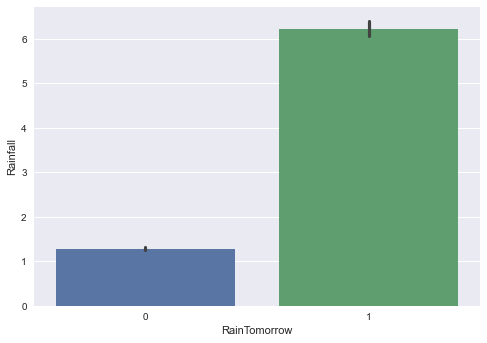

In [63]:
sns.barplot(df['RainTomorrow'], df['Rainfall'])
plt.show()

In [64]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

In [201]:
#deviding the different variables in to groups

A = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
B = ['Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm']
C = ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']
D = ['MinTemp', 'MaxTemp', 'Temp9am','Temp3pm']
E = ['Cloud9am', 'Cloud3pm', 'Evaporation', 'Sunshine']
F = ['Day', 'Month', 'Year']

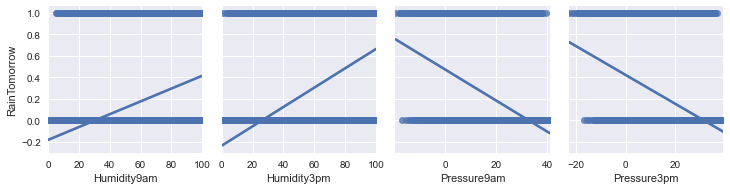

In [254]:
sns.pairplot(df, y_vars = "RainTomorrow", x_vars = B, kind = 'reg')
plt.show()

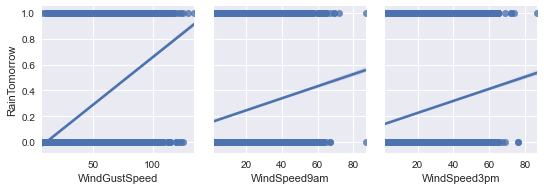

In [255]:
sns.pairplot(df, y_vars = "RainTomorrow", x_vars = C, kind = 'reg')
plt.show()

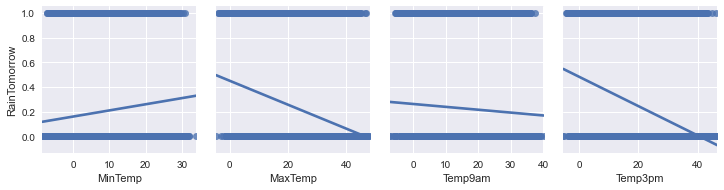

In [256]:
sns.pairplot(df, y_vars = "RainTomorrow", x_vars = D, kind = 'reg')
plt.show()

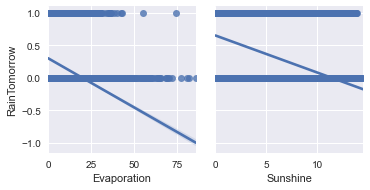

In [23]:
sns.pairplot(df, y_vars = "RainTomorrow", x_vars = E[2:], kind = 'reg')
plt.show()

In [28]:
DirDict = {'N': 1,'NNE': 2,'NE': 3,'ENE': 4,'E': 5,'ESE': 6,'SE': 7,'SSE': 8,'S': 9,
           'SSW': 10,'SW': 11,'WSW': 12,'W': 13,'WNW': 14,'NW': 15,'NNW': 16}
dftmp = df.replace(DirDict).sort_values('WindGustDir')

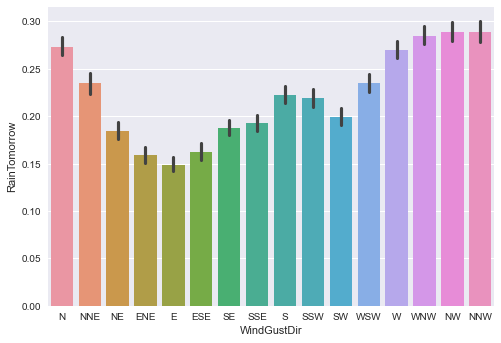

In [29]:
sns.barplot(dftmp['WindGustDir'],dftmp['RainTomorrow'])
plt.xticks(range(16), list(DirDict.keys()))
plt.show()

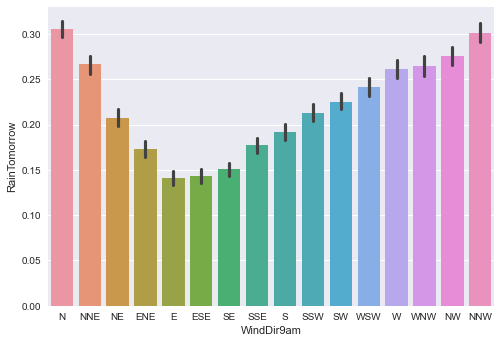

In [30]:
sns.barplot(dftmp['WindDir9am'],dftmp['RainTomorrow'])
plt.xticks(range(16), list(DirDict.keys()))
plt.show()

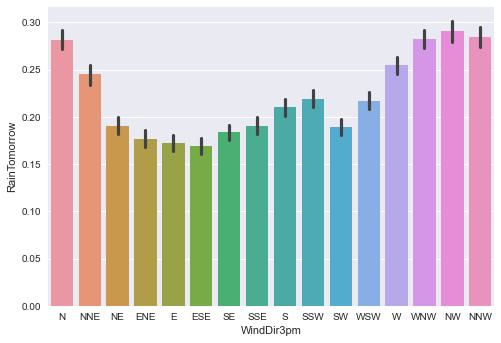

In [31]:
sns.barplot(dftmp['WindDir3pm'],dftmp['RainTomorrow'])
plt.xticks(range(16), list(DirDict.keys()))
plt.show()

In [143]:
F

['Day', 'Month', 'Year']

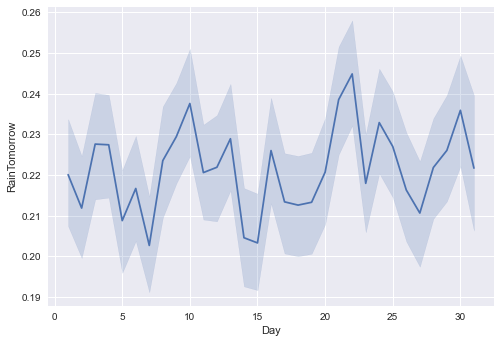

In [66]:
sns.lineplot(df['Day'], df['RainTomorrow'])
plt.show()

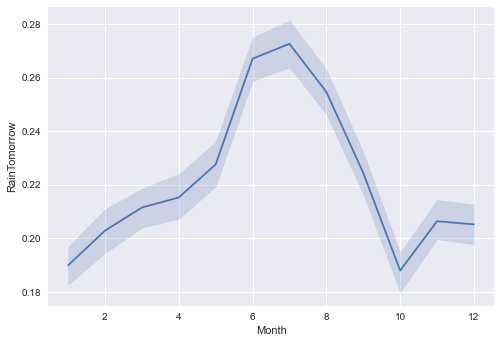

In [67]:
sns.lineplot(df['Month'], df['RainTomorrow'])
plt.show()

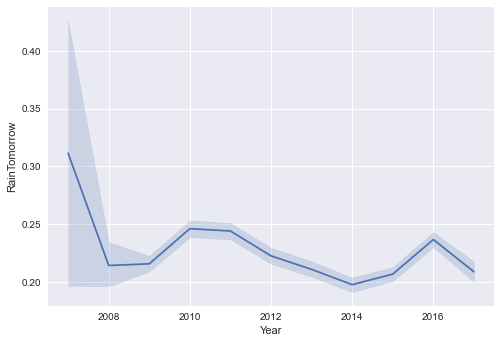

In [68]:
sns.lineplot(df['Year'], df['RainTomorrow'])
plt.show()

In [202]:
#not only this relationship doesnt teach much
#but also thier arent enouth samples
#which could result in a bias/underfitting of the model
df.drop('Year', axis = 1, inplace = True)
F.remove('Year')

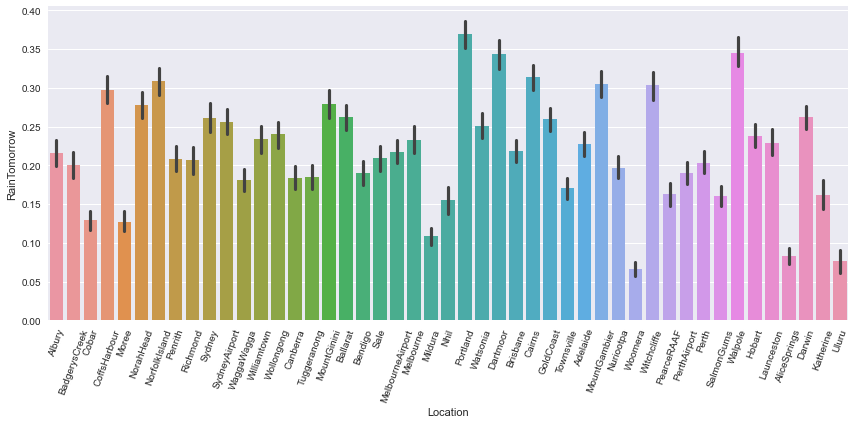

In [208]:
plt.figure(figsize = (12,6))
sns.barplot(df['Location'],df['RainTomorrow'])
plt.xticks(rotation=70, size = 10)
plt.tight_layout()
plt.show()

### dealing with categorial data

In [ ]:
#Using pdandas.get_dummies method on the categorial data would
#make to much columns and that would make it hard for mechine_learnning algorithms
#to figure out what to do with them
#so Ill atempt to create the approprate columns by myself

In [199]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney',
       'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong',
       'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat', 'Bendigo',
       'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil',
       'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth',
       'SalmonGums', 'Walpole', 'Hobart', 'Launceston', 'AliceSprings',
       'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [203]:
lat = {'Albury':-36.080780,
 'BadgerysCreek' : -33.87,
 'Cobar' : -31.4987,
 'CoffsHarbour' : -30.296276,
 'Moree' : -29.464411,
 'NorahHead': -33.283344,
 'NorfolkIsland' : -29.0328,
 'Penrith': -33.758011,
 'Richmond': -37.823002,
 'Sydney' :  -33.870453,
 'SydneyAirport': -33.947346 ,
 'WaggaWagga' : -35.117275,
 'Williamtown': -32.8090 ,
 'Wollongong': -34.425072,
 'Canberra' : -35.282001 ,
 'Tuggeranong' : -35.4244 , 
 'MountGinini' : -35.5333 , 
 'Ballarat' : -37.549999, 
 'Bendigo' : -36.757786,
 'Sale' : -38.099998, 
 'MelbourneAirport': -37.663712,
 'Melbourne' : -37.840935 ,
 'Mildura' : -34.206841,
 'Nhil' : -36.3333 ,
 'Portland' : -38.3462 ,
 'Watsonia' : -37.7110 ,
 'Dartmoor' : -37.92225, 
 'Brisbane' : -27.470125, 
 'Cairns' : -16.925491,
 'GoldCoast' : -28.016666,
 'Townsville' : -19.258965,
 'Adelaide' : -34.921230,
 'MountGambier' : -37.824429,
 'Nuriootpa' : -34.4683 ,
 'Woomera' : -31.19981,
 'Witchcliffe' : -34.0260 ,
 'PearceRAAF' : -31.6677 ,
 'PerthAirport' : -31.9360 ,
 'Perth' : -31.953512,
 'SalmonGums' : -32.9879,
 'Walpole' : -34.977749 ,
 'Hobart' : -42.880554,
 'Launceston' : -41.429825,
 'AliceSprings' : -23.6975 ,
 'Darwin' : -12.462827,
 'Katherine' : -14.4667 ,
 'Uluru' : -25.344490}

In [204]:
lng = {'Albury': 146.916473,
 'BadgerysCreek': 150.73,
 'Cobar' : 145.8418,
 'CoffsHarbour': 153.114136,
 'Moree' : 149.845108,
 'NorahHead' : 151.566118,
 'NorfolkIsland' : 167.9544,
 'Penrith' : 150.705444,
 'Richmond' : 144.998001,
 'Sydney' : 151.208755,
 'SydneyAirport' : 151.179428,
 'WaggaWagga' : 147.356522, 
 'Williamtown': 151.8390, 
 'Wollongong' : 150.893143,
 'Canberra' : 149.128998,
 'Tuggeranong' : 149.0888,
 'MountGinini' : 148.7833, 
 'Ballarat' : 143.850006, 
 'Bendigo' : 144.278702,
 'Sale': 147.066666,
 'MelbourneAirport' : 144.844788, 
 'Melbourne' : 144.946457, 
 'Mildura' : 142.136490, 
 'Nhil' : 141.6500,
 'Portland' : 141.6026, 
 'Watsonia' : 145.0838,
 'Dartmoor' : 141.2749,
 'Brisbane' : 153.021072,
 'Cairns' : 145.754120,
 'GoldCoast' : 153.399994,
 'Townsville' : 146.816956,
 'Adelaide' : 138.599503,
 'MountGambier' : 140.783783,
 'Nuriootpa' : 138.9977,
 'Woomera' : 136.83258,
 'Witchcliffe' : 115.1000,
 'PearceRAAF' : 116.0090,
 'PerthAirport' : 115.9640,
 'Perth' : 115.857048,
 'SalmonGums' : 121.642235,
 'Walpole' : 116.731773,
 'Hobart' : 147.324997,
 'Launceston' : 147.157135, 
 'AliceSprings' : 133.8836,
 'Darwin' : 130.841782,
 'Katherine' : 132.2667,
 'Uluru' : 131.035431}

In [205]:
df['latitude'] = df['Location'].replace(lat)
df['longitude'] = df['Location'].replace(lng)
df.drop('Location', axis = 1, inplace = True)
df[['latitude', 'longitude']]

,latitude,longitude
0,-36.08078,146.916473
1,-36.08078,146.916473
2,-36.08078,146.916473
3,-36.08078,146.916473
4,-36.08078,146.916473
...,...,...
123705,-25.34449,131.035431
123706,-25.34449,131.035431
123707,-25.34449,131.035431
123708,-25.34449,131.035431


In [153]:
A

['WindGustDir', 'WindDir9am', 'WindDir3pm']

In [206]:
#each dircation can be expressed as a sum of 2 vectors

north_south = {'N': 1,'NNE': 0.75,'NE': 0.5,'ENE': 0.25,'E': 0,'ESE': -0.25,'SE': -0.5,'SSE': -0.75,'S': -1,
               'SSW': -0.75,'SW': -0.5,'WSW':-0.25,'W': 0,'WNW': 0.25,'NW': 0.5,'NNW': 0.75}

east_west = {'N': 0,'NNE': 0.25,'NE': 0.5,'ENE': 0.75,'E': 1,'ESE': 0.75,'SE': 0.5,'SSE': 0.25,'S': 0,
               'SSW': -0.25,'SW': -0.5,'WSW':-0.75,'W': -1,'WNW': -0.75,'NW': -0.5,'NNW': -0.25}

df['e_w_Gust'] = df.WindGustDir.replace(east_west)
df['e_w_3pm'] = df.WindDir3pm.replace(east_west)
df['e_w_9am'] = df.WindDir9am.replace(east_west)
df['n_s_Gust'] = df.WindGustDir.replace(north_south)
df['n_s_3pm'] = df.WindDir3pm.replace(north_south)
df['n_s_9am'] = df.WindDir9am.replace(north_south)

df['e_w_to_n_s'] = (df['e_w_Gust'] + 2).div((df['n_s_Gust']) + 2)#dont want to divide by zero

df.drop(A, axis = 1, inplace = True)
df[['e_w_Gust','n_s_Gust','e_w_to_n_s']]

,e_w_Gust,n_s_Gust,e_w_to_n_s
0,-1.00,0.00,0.500000
1,-0.75,0.25,0.555556
2,-0.75,-0.25,0.714286
3,0.50,0.50,1.000000
4,-1.00,0.00,0.500000
...,...,...,...
123705,1.00,0.00,1.500000
123706,1.00,0.00,1.500000
123707,-0.25,0.75,0.636364
123708,0.00,1.00,0.666667


### Applaing the models

In [207]:
#splitting the data to train-test parts

target = df['RainTomorrow']
df.drop('RainTomorrow', axis = 1, inplace = True)

train_size = int(np.round(0.9*rows))

Y = target

In [208]:
#baceline preformance

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(df[:train_size],Y[:train_size])
dummy.score(df[train_size:],Y[train_size:])

0.8199822164740118

In [209]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(df[:train_size],Y[:train_size])
y_pred = knn.predict(df[train_size:])
a = metrics.accuracy_score(Y[train_size:], y_pred)
a

0.8654110419529545

In [210]:
#feture selection

df_knn = df.copy()
cols = df_knn.columns

for i in cols:
    X = df_knn.drop(i, axis = 1)
    knn.fit(X[:train_size],Y[:train_size])
    y_pred = knn.predict(X[train_size:])
    b = metrics.accuracy_score(Y[train_size:], y_pred)
    if b >= a:
        df_knn = X

In [211]:
df_knn.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Cloud3pm',
       'Temp3pm', 'Month', 'Day', 'latitude', 'longitude'],
      dtype='object')

In [212]:
#checking the models preformance for different values for the n_neighbours atrabute

K_range = [1,3,5,7,9,11,13,15,17,19,21,23,31,51,71,91]
scores = []
X = df_knn

for k in K_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X[:train_size], Y[:train_size])
    y_pred = knn.predict(X[train_size:])
    scores.append(metrics.accuracy_score(Y[train_size:], y_pred)),sum(np.abs(Y[train_size:]-y_pred))       

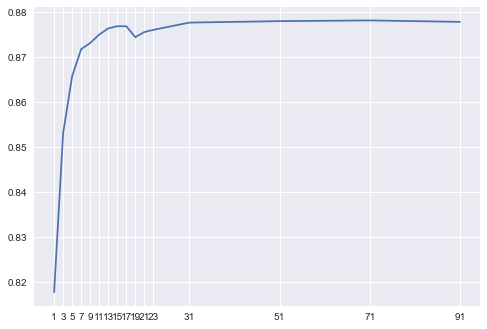

0.8781828469808423


In [213]:
plt.plot(K_range, scores)
plt.xticks(K_range)
plt.grid(True)
plt.show()
print(max(scores))

In [214]:
K = 31

In [215]:
dtc = tree.DecisionTreeClassifier() 
    
dtc.fit(df[:train_size],Y[:train_size])
y_pred = dtc.predict(df[train_size:])
a = metrics.accuracy_score(Y[train_size:], y_pred)
a

0.790396895966373

In [216]:

df_dtc = df.copy()
cols = df_dtc.columns

for i in cols:
    X = df_dtc.drop(i, axis = 1)
    dtc.fit(X[:train_size],Y[:train_size])
    y_pred = dtc.predict(X[train_size:])
    b = metrics.accuracy_score(Y[train_size:], y_pred)
    if b >= a:
        df_dtc = X

In [217]:
df_dtc.columns

Index(['MinTemp', 'MaxTemp', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud3pm', 'RainToday', 'Month', 'Day', 'e_w_Gust',
       'e_w_9am', 'n_s_Gust'],
      dtype='object')

In [219]:
#checking the models preformance for different values for the max_leaf_nodes
#atrabute which is the maximum number of samples required to be at a leaf node

leaf_range = [10,20,30,40,50,60,70,80,90,100]
scores = []


for l in leaf_range:
    dtc = tree.DecisionTreeClassifier(max_leaf_nodes= l)    
    dtc.fit(df_dtc[:train_size], Y[:train_size])
    y_pred = dtc.predict(df_dtc[train_size:])
    scores.append(metrics.accuracy_score(Y[train_size:], y_pred))

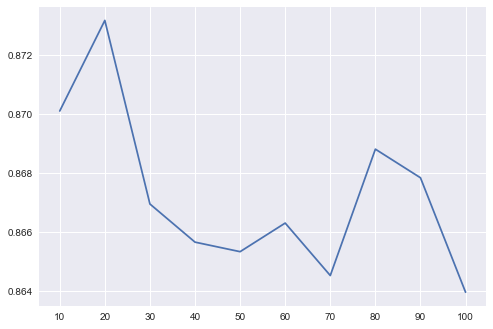

0.8731711260205319


In [220]:
sns.lineplot(leaf_range, scores)
plt.xticks(leaf_range)
plt.grid(True)
plt.show()
print(max(scores))

In [221]:
maxL = 20

In [222]:
#the criterion atrabute states wich type of calculation the algorithm use to detrmain
#which split produces the most purity

dtc = tree.DecisionTreeClassifier(max_leaf_nodes = maxL)    
dtc.fit(df_dtc[:train_size], Y[:train_size])
y_pred = dtc.predict(df_dtc[train_size:])
print(metrics.accuracy_score(Y[train_size:], y_pred))

dtc = tree.DecisionTreeClassifier(criterion= 'entropy', max_leaf_nodes = maxL)    
dtc.fit(df_dtc[:train_size], Y[:train_size])
y_pred = dtc.predict(df_dtc[train_size:])
print(metrics.accuracy_score(Y[train_size:], y_pred))

0.8731711260205319
0.8709886023765258


In [223]:
#gini calculation is better

In [228]:
#like the privius just the minmum 

leaf_range = [50,100,200,350,500,700,1000,2000,2500,3000,4000,4500]
scores = []


for size in leaf_range:
    dtc = tree.DecisionTreeClassifier(min_samples_leaf = size)    
    dtc.fit(df_dtc[:train_size], Y[:train_size])
    y_pred = dtc.predict(df_dtc[train_size:])
    scores.append(metrics.accuracy_score(Y[train_size:], y_pred))

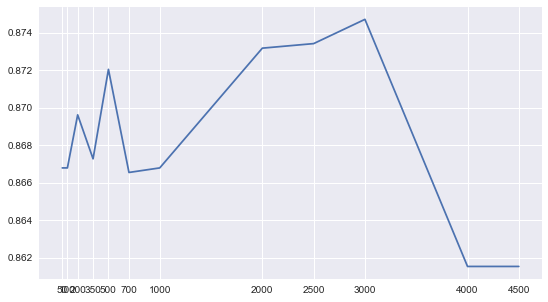

0.8747069759922399


In [229]:
plt.figure(figsize = (9,5))
sns.lineplot(leaf_range, scores)
plt.xticks(leaf_range)
plt.grid(True)
plt.show()
print(max(scores))

In [230]:
minL = 3000

In [231]:
dtc = tree.DecisionTreeClassifier(min_samples_leaf = minL, max_leaf_nodes = maxL)
dtc.fit(df_dtc[:train_size], Y[:train_size])
y_pred = dtc.predict(df_dtc[train_size:])
print(metrics.accuracy_score(Y[train_size:], y_pred))

0.8747069759922399


In [232]:
#trying to see if Standazing/Normlasing the data would makes any difference
#their is no need to check for the decision_tree_classifier since it doesnt calculate distances
#as part of its algorithm

m = MinMaxScaler()
s = StandardScaler()

Y2 = target.copy()
X1 = df_knn.copy()
X2 = df_knn.copy()
X1[list(X1.columns)] = m.fit_transform(X1[list(X1.columns)])
X2[list(X2.columns)] = s.fit_transform(X2[list(X2.columns)])


knn = KNeighborsClassifier(n_neighbors=5)


for i in [df_knn, X1, X2]:
    knn.fit(i[:train_size],Y2[:train_size])
    y_pred = knn.predict(i[train_size:])
    print(metrics.accuracy_score(Y2[train_size:], y_pred))

0.8658152129981408
0.8624201762185757
0.8620160051733894


In [278]:
#looks like the algorithm work best without any change 

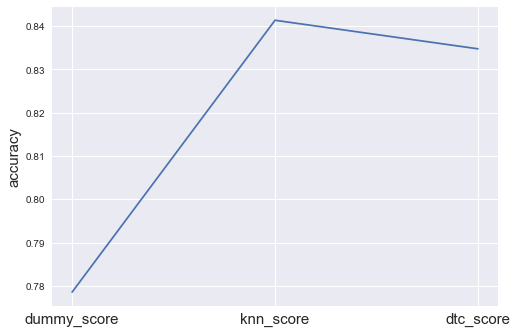

In [233]:
#final more accurate accuracy test using cross-validation

dtc = tree.DecisionTreeClassifier(min_samples_leaf = minL, max_leaf_nodes = maxL)
knn = KNeighborsClassifier(n_neighbors=K)

dummy_score = cross_val_score(dummy, df, Y, cv=10, scoring='accuracy').mean()
knn_score = cross_val_score(knn, df_knn, Y, cv=10, scoring='accuracy').mean()
dtc_score = cross_val_score(dtc, df_dtc, Y, cv=10, scoring='accuracy').mean()

x = [1,2,3]
plt.plot(x,[dummy_score, knn_score, dtc_score])
plt.xticks(range(1,len(x)+1),['dummy_score', 'knn_score', 'dtc_score'], fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)
plt.show()

### exploring the models preformance

In [234]:
knn.fit(df_knn[:train_size], Y[:train_size])
y_pred = knn.predict(df_knn[train_size:])
confusion = metrics.confusion_matrix(Y[train_size:], y_pred)

In [235]:
TP = confusion[1, 1]#those who have been idenfided positvely(rain tommorow) correctly
TN = confusion[0, 0]#those who have been idenfided negetivly(no rain tommorow) correctly
FP = confusion[0, 1]#those who have been idenfided positvely(rain tommorow) incorrectly
FN = confusion[1, 0]#those who have been idenfided negetivly(no rain tommorow) incorrectly

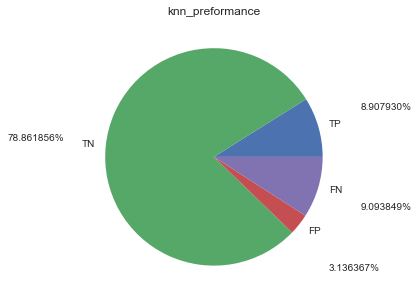

In [236]:
plt.figure(figsize = (5,5))
plt.pie([TP,TN,FP,FN], labels = ['TP','TN','FP','FN'], autopct = '%2f%%', pctdistance = 1.65)
plt.title('knn_preformance')
plt.show()

In [237]:
#From all of those that have been identefied as posetive, as in: 'it would rain tommorow',
#just how much have been identefied correctly"
preceision = TP/(TP+FP)

#From all of the posetive instances(The days it rained a day after)
#just how much have been identefied
recall = TP/(TP+FN)

print("precision/specificty: " + str(preceision))
print("recall/sensitivity: " + str(recall))

precision/specificty: 0.7395973154362416
recall/sensitivity: 0.49483610237988324


In [238]:
dtc.fit(df_dtc[:train_size], Y[:train_size])
y_pred = dtc.predict(df_dtc[train_size:])
confusion = metrics.confusion_matrix(Y[train_size:], y_pred)

In [239]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

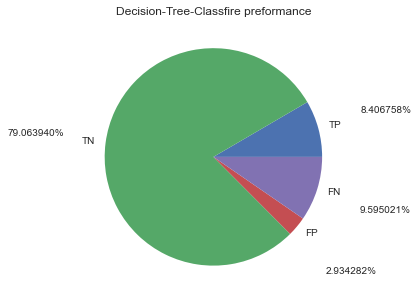

In [240]:
plt.figure(figsize = (5,5))
plt.pie([TP,TN,FP,FN], labels = ['TP','TN','FP','FN'], autopct = '%2f%%', pctdistance = 1.65)
plt.title('Decision-Tree-Classfire preformance')
plt.show()

In [241]:
#both models preform very simlarly

In [242]:
preceision = TP/(TP+FP)

recall = TP/(TP+FN)

print("precision/specificty: " + str(preceision))
print("recall/sensitivity: " + str(recall))

precision/specificty: 0.7412687099073414
recall/sensitivity: 0.46699595868881905


In [243]:
y_pred_prob_knn = knn.predict_proba(df_knn[train_size:])[:,1]
y_pred_prob_dtc = dtc.predict_proba(df_dtc[train_size:])[:,1]

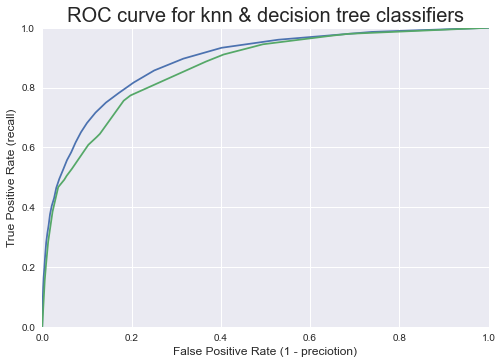

In [244]:
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(Y[train_size:], y_pred_prob_knn)
fpr_dtc, tpr_dtc, thresholds_dtc = metrics.roc_curve(Y[train_size:], y_pred_prob_dtc)

plt.plot(fpr_knn, tpr_knn)
plt.plot(fpr_dtc, tpr_dtc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for knn & decision tree classifiers', fontsize = 20)
plt.xlabel('False Positive Rate (1 - preciotion)', fontsize = 12)
plt.ylabel('True Positive Rate (recall)', fontsize = 12)
plt.grid(True)
plt.show()

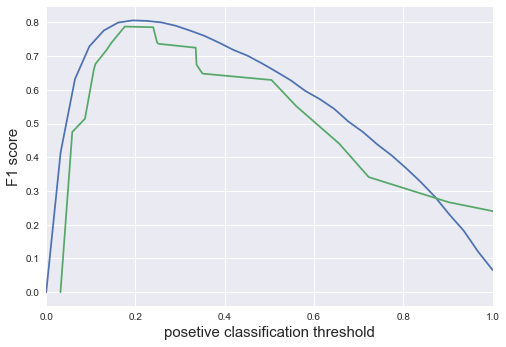

In [245]:
f1_knn = (2*(tpr_knn*(1 - fpr_knn)))/(tpr_knn + (1 - fpr_knn))
f1_dtc = (2*(tpr_dtc*(1 - fpr_dtc)))/(tpr_dtc + (1 - fpr_dtc))


sns.lineplot(thresholds_knn, f1_knn)
sns.lineplot(thresholds_dtc, f1_dtc)
plt.xlim([0.0, 1.0])
plt.ylabel('F1 score', fontsize = 15)
plt.xlabel('posetive classification threshold', fontsize = 15)
plt.show()

In [ ]:
#So the best I can get is F1score of 0.8
#using the knn model